In [2]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

2025-09-29 22:18:52.845618: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-29 22:18:53.238737: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-29 22:18:54.739329: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [3]:
plt.rc('figure',autolayout=True)
plt.rc('image',cmap="magma")

In [4]:
# define the kernel
kernel = tf.constant([[-1, -1, -1],
                    [-1,  8, -1],
                    [-1, -1, -1],
                   ])

E0000 00:00:1759163636.475947    6012 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1759163636.481750    6012 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [5]:
image = tf.io.read_file('Ganesh.jpg')
image=tf.io.decode_jpeg(image,channels=1)
image = tf.image.resize(image,size=[300,300])

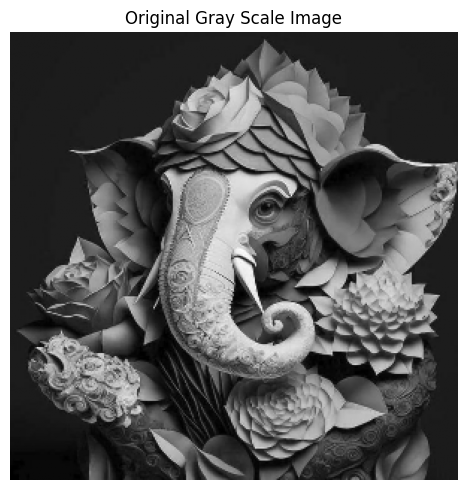

In [6]:
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5,5))
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale Image')
plt.show()

In [7]:
image = tf.image.convert_image_dtype(image,dtype=tf.float32)
image = tf.expand_dims(image,axis = 0)
kernel = tf.reshape(kernel,[*kernel.shape,1,1])
kernel = tf.cast(kernel,dtype=tf.float32)

In [8]:
conv_fn = tf.nn.conv2d

In [9]:
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides = 1,
    padding='SAME',
)

Text(0.5, 1.0, 'Convolution')

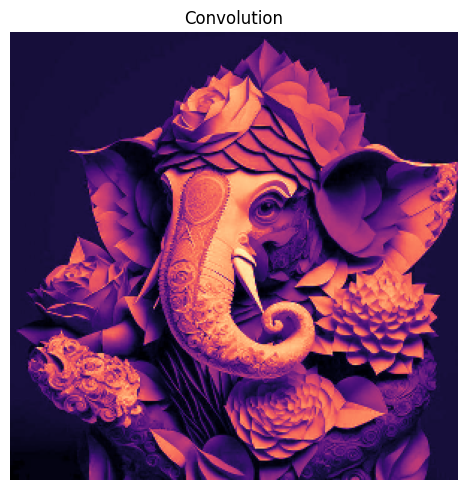

In [10]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)

plt.imshow(tf.squeeze(image))
plt.axis('off')
plt.title('Convolution')

Text(0.5, 1.0, 'Activation')

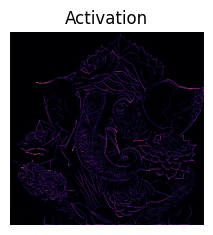

In [12]:
relu_fn = tf.nn.relu
image_detect = relu_fn(image_filter)

plt.subplot(1,3,2)
plt.imshow(
    tf.squeeze(image_detect)
)

plt.axis('off')
plt.title('Activation')


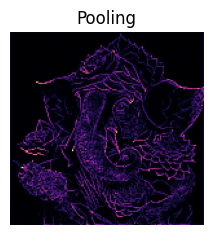

In [13]:
pool = tf.nn.pool
image_condense = pool(input=image_detect,
                      window_shape =(2,2),
                      pooling_type='MAX',
                      strides=(2,2),
                      padding='SAME'
                      )

plt.subplot(1,3,3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()